# Assignment 1 (20pts)



Please read the `opticalflow.pdf` that comes with this iPython notebook.  That will go over the theory behind what you will be doing in this assignment.

This hw will go through all the sub-modules you'll need to run to build your optical flow program.

## Necessary Modules

You should not need any extra python import statements to do any of this hw than what is in the below cell.

For full credit, do not import any extra modules.

In [1]:
# Necessary Modules
import numpy as np
import imageio as io

import time

%matplotlib inline
import matplotlib.pyplot as plt

#rgba2rgb taken from https://stackoverflow.com/questions/50331463/convert-rgba-to-rgb-in-python/50332356
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

## 2D Convolutions (5pts)

In this section, we will create our `conv2d` function.

### Question 1: Convolution Output Size (1pt)

Your input image is size MxN.  Your filter size is mxn.  As we discussed in lecture, your convolution output will be (M-m+1)x(N-n+1) if you convolve your filter only where it fully fits inside the image.  However, we introduce two new variables in this hw for convolutions: padding and stride.

Padding is a margin of 0's we will add to our image.  You can achieve this with `np.pad`.  For example, `padding=3` would create a margin width of 3 of 0's all around your image.

Stride is the step size of your convolution kernel.  The default stride is 1, where we simply step by 1 to take our next kernel dot product.  However, if we set `stride=2`, after every kernel dot product, we will skip a location, and move on to the next location.  If `stride=3`, we will skip 2 locations, and make a step size of 3.

For the function `conv2d(img, kernel, pad, stride)` where
- `img.shape = M,N`
- `kernel.shape = m,n`
- `pad = P`
- `stride=S`

What is the size of our output convolution?

#### Answer 1
If we apply a filter of dimension $ m \times n $ in $ (M+2P) \times (N+2P) $ input matrix with padding P at each side and we consider a generic stride S, then we will get output matrix dimension: $$ ( \frac{M-m+2P+1}{S})\times(\frac{N-n+2P+1}{S}) $$ 

### Question 2: Convolution Time Complexity (1pt)

In lecture, we learned that the time complexity of a convolution operation (with default values of `pad` and `stride`) is O(MNmn).  What is the new time complexity incorporating `pad` and `stride`.

#### Answer 2
The new time complexity incorporating the pad and a generic stride value S is: 
$$ O(\frac{(M+2pad)(N+2pad)mn}{S^{2}}) $$
It is possible to observe how incresing the padding value the time complexity will increase, instead the time complexity will decrease quadratically increasing the stride during the convolution.

### Question 3: 2-D Convolution (3pt)

You will write a 2-D convolution function.  It will take in a 2D (not color) image, a 2D filter, padding, and a stride.  It will spit you out the resulting conv2d operation.

(1pt for getting the base convolution function, 1pt for getting pad, 1pt for getting stride)

In [2]:
def conv2d(img, kernel, pad=0, stride=1):
    # INPUTS:
    #  img: (2d.array) of size MxN
    #  kernel: (2d.array) of size mxn
    #  pad: (int >= 0) padding size
    #  stride: (int >= 1) stepsize for convolutions
    # OUTPUTS:
    #  OUT: (2d.array) of size ?x?
    
    M,N = img.shape
    m,n = kernel.shape
    
    outy=int(((M - m +2*pad+1)/stride))
    outx=int(((N - n +2*pad+1)/stride))
    out = np.zeros((outy, outx))
    
    #---------PADDING--------
    # Here, we want to use np.pad to pad our input image
    # with the variable pad.
    
    if pad>0:
        img=np.pad(img, ((pad,pad),(pad,pad)))
    pass
    #------------------------
    
    #---------CONVOLUTION--------
    # Here, we do a double for-loop to loop over every
    # location in our padded img.  At each location,
    # we take a dot-product with our kernel. We store
    # the output value in the corresponding location of out.
    for i in range(0,outy):
        for j in range(0,outx):
            out[i][j]=np.sum(img[i*stride:i*stride+m, j*stride:j*stride+n]*kernel)
    pass
    #----------------------------
    return out

### Conv2d Test Code: (0pts)

Running this code should get you a very small, blurry Bento with a thick margin.

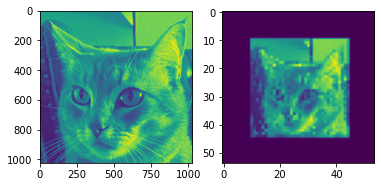

In [3]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)          #turn image into gray

kernel = np.ones((5,5)) / 25         #create an average filter
out = conv2d(img, kernel, pad=300, stride=30)

fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(out)

In [4]:
print('Original image dimension:', img.shape)
print('Dimension of the image after the padding and the stride:', out.shape)

Original image dimension: (1024, 1024)
Dimension of the image after the padding and the stride: (54, 54)


### Conv2d Time Complexity Visualization: (0pts)

Running this code will give you a visualization of the different time complexities.  We vary the sizes of the filter and stride, but keep pad to offset our filtersize.

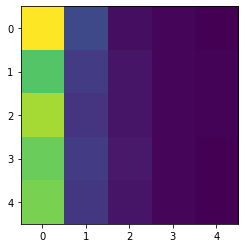

In [5]:
time_viz = np.zeros((5,5))
img = np.random.rand(100,100)

for ii,filt_size in enumerate([1,3,5,7,9]):
    for jj,stride in enumerate([1,2,3,4,5]):
        time_start = time.time()
        filt = np.random.rand(filt_size,filt_size)
        filt = filt/sum(filt)
        out  = conv2d(img, filt, pad=int((filt_size-1)/2), stride=stride)
        time_tot = time.time() - time_start
        time_viz[ii,jj] = time_tot
        
plt.imshow(time_viz)


In [6]:
print (time_viz)

[[0.10671377 0.02592945 0.00698137 0.00498796 0.00299144]
 [0.07878923 0.02094269 0.00897813 0.00498605 0.00398922]
 [0.09278464 0.01895642 0.00896907 0.00495648 0.0039885 ]
 [0.08280969 0.02091241 0.0099721  0.00498652 0.00299191]
 [0.08580399 0.0199151  0.00900769 0.00499058 0.00299191]]


### Question 4: Convolution Time Complexity (1pt extra credit)

Is the visualization what you thought it would be?  If not, describe why you think it might look different in practice than in mathematical theory.

What I expect is that increasing the value of the stride the time will decrease, because the number of computations will decrease when the stride increases. For instance if stride == 2, then the time complexity will decrease of $\frac{1}{4}$. In fact, it is possible to observe that the time complexity along the rows (from the left to the right) decreases quadratically. In the case in which the `conv2d()` function is implemented through four for loops instead than with two for loops, then the time complexity along the rows would probably decrease linearly. 
On the other hand, increasing the kernel size does not seem to uniformly increase the computational time, as instead it is expected from the mathematical theory, for which the time complexity is linear increasing along the columns. This is probably due to the fact that the increase in computational time needed by the algorithm when increasing the kernel size by a small amount is comparable to the time physically needed by the processor to work (i.e. the time it takes for the current to flow through the silicon chip). If instead we let the kernel size incresing considerably, the growth in time is observed to be much sharper and more linear, as it is possible to observe in the following cell. 

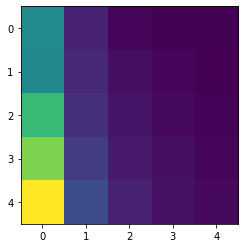

In [7]:
time_viz = np.zeros((5,5))
img = np.random.rand(100,100)

for ii,filt_size in enumerate([1,30,50,70,90]):
    for jj,stride in enumerate([1,2,3,4,5]):
        time_start = time.time()
        filt = np.random.rand(filt_size,filt_size)
        filt = filt/sum(filt)
        out  = conv2d(img, filt, pad=int((filt_size-1)/2), stride=stride)
        time_tot = time.time() - time_start
        time_viz[ii,jj] = time_tot
        
plt.imshow(time_viz)


In [8]:
print (time_viz)

[[0.10268927 0.02393436 0.00698113 0.0039897  0.00400543]
 [0.0997169  0.02596831 0.01093316 0.00598407 0.00302815]
 [0.14258265 0.03195143 0.0149622  0.0079391  0.00501704]
 [0.16951632 0.04089069 0.01798677 0.01096725 0.00598598]
 [0.20944691 0.05182219 0.02297211 0.01193285 0.00797892]]


## Important Kernels (7pts)

In this section, we will create code to blur our image using a gaussian kernel.

We will also create a module to take the x- and y- derivative of the image, both using very simple derivative kernels and using a more sophisticated Sobel filter.

### Question 5: Gaussian Blur (2pt)

We will blur our image with a gaussian kernel.

You will have to first create the gaussian kernel and then feed it in, together with your image, to your convolution.  Note that you should calculate your pad based on the kernel you create to make your convolutional output the same size as your input (if `stride=1`).

1pt for the gaussian kernel, and 1pt for doing the convolution fully correctly (i.e. feeding in the right pad).

#### Answer right padding
If we apply a filter of dimension $ m \times n $ in $ (M+2P) \times (N+2P) $ input matrix with padding P at each side and we consider a generic stride value S, then we will get output matrix dimension: $$ ( \frac{M-m+2P}{S}+1)\times(\frac{N-n+2P}{S}+1) $$ 
In order to obtain an output matrix whose dimensions are the same of the input image $ M \times N $: $$ ( \frac{M-m+2P+1}{S}) = \frac{M}{S} $$ $$ ( \frac{N-n+2P+1}{S}) = \frac{N}{S} $$ the value that $ 2p $ has to assume is of: $$ m-1 $$ and $$ n-1 $$
These computations are valid under the assumption that the kernel will be squared. 


In [9]:
def blur_gaussian(img, sigma=1, stride=1):
    out = np.zeros_like(img)
    #---------CREATE-KERNEL--------
    # To utilize the conv2d module you've created, we
    # have to create the gaussian kernel with the 
    # appropriate sigma.  Create a kernel that's roughly
    # the size of 4*sigma X 4*sigma, where the kernel's
    # intensities correspond to a guassian centered at
    # the center with the corresponding sigma.
    # tip: use np.meshgrid
    # tip: Formula f(x,y) = exp[ -( x^2 + y^2 ) / (2 * sigma^2) ]
    # tip: don't forget to normalize!
    
    x_axis = np.linspace(-2*sigma, 2*sigma, 4*sigma) 
    y_axis = np.linspace(-2*sigma, 2*sigma, 4*sigma) 
    xx, yy = np.meshgrid(x_axis, y_axis)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel /= np.sum(kernel) 
    pass
    #------------------------------
    
    #---------DO-CONVOLUTION--------
    m,n = kernel.shape
    M,N = img.shape
    p = int(np.ceil((m-1)/2))
    out = conv2d(img, kernel, p, stride)
    pass
    #-------------------------------
    
    return out

### blur_gaussian test code: (0pt)

You should see a blurred Bento.

Original image dimension: (1024, 1024)
Dimension of the image after blurring: (205, 205)


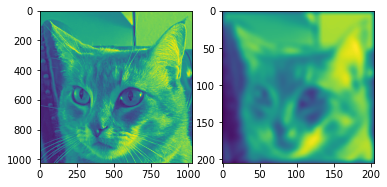

In [10]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)          #turn image into gray

out = blur_gaussian(img, sigma=20, stride=5) #we increase stride just to speed up

fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(out)

print('Original image dimension:', img.shape)
print('Dimension of the image after blurring:', out.shape)

### Question 6: Quick Derivative (2pt + 1pt EC)

Create a simple derivative filter.  Make sure your output is the same dimensions as your input.

1pt for the x direction, and 1 pt for the y direction.  

The easiest way will be to create a derivative filter and use your conv2d function.  But 1pt extra credit if you can solve it differently and make it faster (and prove it with the timining function)!

In [11]:
def grad_simple(img):
    outx = np.zeros_like(img)
    outy = np.zeros_like(img)
    
    #---------DO-SIMPLE-GRAD--------
    # Create a Robert filter in the x and y direction.
    # Refer to lecture.
    # Prepare the kernels
    Dx= np.array( [[1,0], 
                  [0,-1]] )
    Dy = Dx.T
    pass
    #------------------------------
    
    #---------DO-CONVOLUTION--------
    outx= conv2d(img, Dy, pad=int(np.ceil((Dy.shape[1]-1)/2)), stride=1)
    outx= outx[0:-1, 0:-1]
    outy= conv2d(img, Dx, pad=int(np.ceil((Dx.shape[0]-1)/2)), stride=1)
    outy= outy[0:-1, 0:-1]
    pass
    #-------------------------------
    
    return outx,outy

### grad_simple test code

Original image dimension: (256, 256)
Dimension of the images after derivation in the x and y directions: (256, 256) (256, 256)


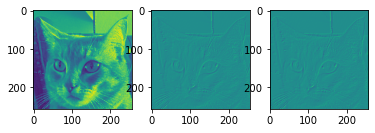

In [12]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)[::4,::4] #turn image into gray and subsample for speed

out = grad_simple(img)

fig,ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(out[0])
ax[2].imshow(out[1])

print('Original image dimension:', img.shape)
print('Dimension of the images after derivation in the x and y directions:', out[0].shape, out[1].shape)

#### Answer faster solution
In order to make the computation of the convolution faster, two possible solutions are: 
1. Shifting the computation on the frequency domain: strategy used when the filter is long or used many times for many images. The function implemented is `quick_rob_freq()`; 
2. Use the scipy function `convolve2d()`: because scipy has several optimization paths to choose the fastest method based on the input sizes and types (I reported it just because I was curious in testing it, I've considered that was not necessary to import any extra modules).

In [13]:
def quick_rob_freq(img):
    
    outx = np.zeros_like(img)
    outy = np.zeros_like(img)
    
    #---------DO-QUICK-GRAD--------
    # Create a Robert filter in the x and y direction.
    # Refer to lecture.
    # Prepare the kernels
    
    Dx= np.array( [[1,0], 
                  [0,-1]] )
    Dy = Dx.T
    
    sz_x = (img.shape[0] - Dx.shape[0], img.shape[1] - Dx.shape[1])  # total amount of padding
    kernel_x = np.pad(Dx, (((sz_x[0]+1)//2, sz_x[0]//2), ((sz_x[1]+1)//2, sz_x[1]//2)), 'constant')
    kernel_x= np.fft.ifftshift(kernel_x)
    
    sz_y = (img.shape[0] - Dy.shape[0], img.shape[1] - Dy.shape[1])  # total amount of padding
    kernel_y = np.pad(Dy, (((sz_y[0]+1)//2, sz_y[0]//2), ((sz_y[1]+1)//2, sz_y[1]//2)), 'constant')
    kernel_y= np.fft.ifftshift(kernel_y)
    
    outx = np.real(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_x)))
    outy = np.real(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_y)))
    
    return outx, outy

In [14]:
from scipy import signal

def quick_rob_sci(img):
    outx = np.zeros_like(img)
    outy = np.zeros_like(img)
    
    #---------DO-QUICK-GRAD--------
    # Create a Robert filter in the x and y direction.
    # Refer to lecture.
    # Prepare the kernels
    Dx= np.array([[1,0],
                  [0,-1]])
    Dy = Dx.T
    
    outx = signal.convolve2d(img, Dy, boundary='symm', mode='same')
    outy = signal.convolve2d(img, Dx, boundary='symm', mode='same')
    pass
    #-------------------------------
    return outx,outy


### quick_rob test code

Original image dimension: (256, 256)
Dimension of the images after derivation in the x and y directions: (256, 256) (256, 256)


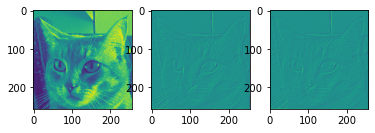

In [15]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)[::4,::4] #turn image into gray and subsample for speed

out = quick_rob_freq(img)

fig,ax = plt.subplots(1,3)


ax[0].imshow(img)
ax[1].imshow(out[0])
ax[2].imshow(out[1])

print('Original image dimension:', img.shape)
print('Dimension of the images after derivation in the x and y directions:', out[0].shape, out[1].shape)

#### Time test

In [16]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)[::4,::4] #turn image into gray and subsample for speed

# Timing Robert gradient
time_start = time.time()
out = grad_simple(img)
time_end = time.time()
t_simple=time_end - time_start
print('Timimg simple gradient function: ' + str(t_simple))

# Timing frequency domain Robert gradient
time_start = time.time()
out = quick_rob_freq(img)
time_end = time.time()
t_freq= time_end - time_start
print('Timimg frequency domain Robert gradient function: ' + str(t_freq))

# Timing built in convolution function + Robert gradient
time_start = time.time()
out = quick_rob_sci(img)
time_end = time.time()
t_built_in=time_end - time_start
print('Timimg built in convolution function + Robert gradient: ' + str(t_built_in))

print('Frequency domain method is', int(t_simple/t_freq), ' times faster than the simple gradient method.')
print('The use of the built-in function is', int(t_simple/t_built_in), ' times faster than the simple gradient method.')

Timimg simple gradient function: 1.1040453910827637
Timimg frequency domain Robert gradient function: 0.023936986923217773
Timimg built in convolution function + Robert gradient: 0.004984617233276367
Frequency domain method is 46  times faster than the simple gradient method.
The use of the built-in function is 221  times faster than the simple gradient method.


### Question 7: Sobel Derivative (2pt)

Create a sobel derivative filter.  Make sure your output is the same dimensions as your input.

1pt for correctly defining the sobel filters, and 1pt for doing the convolutions correctly.

In [17]:
def grad_sobel(img):
    outx = np.zeros_like(img)
    outy = np.zeros_like(img)
    
    #---------CREATE-KERNEL--------
    # Create a sobel filter in the x and y direction.
    # Refer to lecture.
    Sx= np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
    Sy = Sx.T
    pass
    #------------------------------
    
    #---------DO-CONVOLUTION--------
    outx= conv2d(img, Sy, pad=int(np.ceil((Sy.shape[1]-1)/2)), stride=1)
    outy= conv2d(img, Sx, pad=int(np.ceil((Sx.shape[0]-1)/2)), stride=1)
    pass
    #-------------------------------
    return outx,outy

Original image dimension: (256, 256)
Dimension of the images after derivation in the x and y directions: (256, 256) (256, 256)


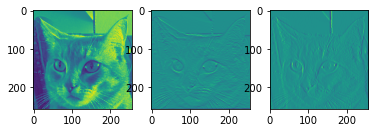

In [18]:
img = io.imread('bento.png')       #read in Bento
img = img.astype(np.float32) / 255 #scale image from 0->1 (not 0->255)
img = np.mean(img,axis=2)[::4,::4] #turn image into gray and subsample for speed

out = grad_sobel(img)

fig,ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(out[0])
ax[2].imshow(out[1])

print('Original image dimension:', img.shape)
print('Dimension of the images after derivation in the x and y directions:', out[0].shape, out[1].shape)

### Question 8: Naive/Quick Derivative vs. Sobel (1pt)

What are the differences in output between the quick and sobel derivative functions?  When would you use either one of them?  Comment on the code output below.

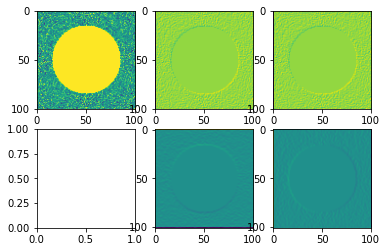

In [19]:
x = np.arange(101) - 50
y = np.arange(101) - 50
xx,yy = np.meshgrid(x,y)

zz = (((xx**2 + yy**2) <= 35**2)+0.9) + np.random.randn(101,101) / 30
zz = np.clip(zz,0,1)

simple = grad_simple(zz)
sobel  = grad_sobel(zz)

fig,ax = plt.subplots(2,3)
ax[0,0].imshow(zz)
ax[0,1].imshow(simple[0])
ax[0,2].imshow(simple[1])
ax[1,1].imshow(sobel[0])
ax[1,2].imshow(sobel[1])

The main differences between the output obtained using the Roberts and the Sobel filters are: 
1. the Sobel filter thanks to the 2 value between the -1 and the 1, it behaves as a gradient filter with a smoothing action. In fact, from the images of the example is possible to observe how the Sobel one acts reducing the Gaussian noise, which instead is present in the Roberts output images; 
2. in the case of the Sobel filter we have a more consistent information, this because each gradient value is derived from a neighborhood of 9 pixel values and not just 4 as in the case of the Robert one.

## Optical Flow (8 pts)

In this section, you will create the Lucas-Kanade Optical Flow algorithm.  Refer to the `opticalflow.pdf` for more information about the theory behind Optical Flow.

### Question 9: LK_optical_flow (5 pts)

- Setting up the Foundations (1pt)
- Setting up the Intermediaries (1pt)
- Finding [Vx,Vy] (3pt)

#### Frequency domain derivative function with Sobel kernel 
Implementation of the derivation in the frequency domain with the Sobel kernel in order to increase the speed of the computation of the optical flow. 

In [20]:
def quick_sob_freq(img):
    
    outx = np.zeros_like(img)
    outy = np.zeros_like(img)
    
    #---------DO-QUICK-GRAD--------
    # Create a Robert filter in the x and y direction.
    # Refer to lecture.
    # Prepare the kernels
    
    Dx= np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
    Dy = Dx.T
    
    sz_x = (img.shape[0] - Dx.shape[0], img.shape[1] - Dx.shape[1])  # total amount of padding
    kernel_x = np.pad(Dx, (((sz_x[0]+1)//2, sz_x[0]//2), ((sz_x[1]+1)//2, sz_x[1]//2)), 'constant')
    kernel_x= np.fft.ifftshift(kernel_x)
    
    sz_y = (img.shape[0] - Dy.shape[0], img.shape[1] - Dy.shape[1])  # total amount of padding
    kernel_y = np.pad(Dy, (((sz_y[0]+1)//2, sz_y[0]//2), ((sz_y[1]+1)//2, sz_y[1]//2)), 'constant')
    kernel_y= np.fft.ifftshift(kernel_y)
    
    outx = np.real(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_x)))
    outy = np.real(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_y)))
    
    return outx, outy

In [21]:
def LK_optical_flow(img0,img1,sigma=1,stride=1,grad=quick_sob_freq):
    # INPUTS:
    #  img0: (2d.array) image at time point t
    #  img1: (2d.array) image at time point t+dt
    #  sigma: (int) the sigma of the initial gaussian blur
    #  stride: the stride of the initial gaussian blur
    #  grad: (module) the gradient function you want to use
    # OUTPUTS:
    #  Vx: (2d.array) OF vector field's x component
    #  Vy: (2d.array) OF vector field's y component
    
    Vx = np.zeros_like(img0)
    Vy = np.zeros_like(img0)
    
    #---------FOUNDATIONS--------
    # First we will take the gaussian blur of
    # both img0 and img1 with sigma and stride.
    # Find Ix, Iy, and It from img0 and img1.
    # Ix and Iy will be the average Ix and Iy
    # over both images. You can
    # simply subtract img0 from img1 to get It.
    Img0_blurred = blur_gaussian(img0, sigma, stride)
    Img1_blurred = blur_gaussian(img1, sigma, stride)
    Ix0,Iy0=grad(img0)
    Ix1,Iy1=grad(img1)

    Ix=np.add(Ix1,Ix0)/2;
    Iy=np.add(Iy1,Iy0)/2;
    It=img1-img0;
    IxIx=Ix**2
    IyIy=Iy**2
    IxIt=Ix*It
    IyIt=Iy*It
    IxIy=Ix*Iy
    
    pass
    #----------------------------
    
    
    #---------INTERMEDIARIES--------
    # To solve our multi-pixel equation, we have to
    # set up our five main quantities:
    #   \sum_i w_i [I_x (q_i)]^2
    #   \sum_i w_i [I_x (q_i) * I_y(q_i)]
    #   \sum_i w_i [I_y (q_i)]^2
    #   - \sum_i w_i [I_x (q_i) * I_t(q_i)]
    #   - \sum_i w_i [I_y (q_i) * I_t(q_i)]
    # Be smart!  Frame this as a convolution!
    # For our weighted window, use a gaussian
    # weighted window with sigma=2.
    row=blur_gaussian(Vx,sigma,stride).shape[0]
    col=blur_gaussian(Vx,sigma,stride).shape[1]
    
    M=np.zeros((row,col,2,2))
    M[:,:,0,0]=blur_gaussian(IxIx,sigma,stride)
    M[:,:,0,1]=blur_gaussian(IxIy+1e-6,sigma,stride)
    M[:,:,1,0]=blur_gaussian(IxIy+1e-5,sigma,stride)
    M[:,:,1,1]=blur_gaussian(IyIy,sigma,stride)
    

    x=np.zeros((row,col,2)) 
    x[:,:,0]=blur_gaussian(-IxIt,sigma,stride)
    x[:,:,1]=blur_gaussian(-IyIt,sigma,stride)
    #-------------------------------

    #---------LK-OPTICAL-FLOW--------
    # To solve the equation, we will have to find
    # the inverse of our M matrix.
    # To do this, we will use np.linalg.solve.
    # More information can be found at:
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
    # hint: use numpy's vectorized format
    # sol=np.linalg.solve(M,x)
    # Vx=sol[0]
    # Vy=sol[1]
    sol=np.linalg.solve(M,x)

    # Since we are using sigma=2, then we have to use a 8x8 neighborhood
    Vx=sol[:,:,0]
    Vy=sol[:,:,1]

    #-------------------------------
    
    
    return Vx,Vy
    pass
    #--------------------------------

#### Different optical flow implementation 
This function implements the Lucas Kanade algorithm without using the numpy's vectorized format for the system of equations resolution and without assigning the Vx and Vy values to a 8x8 neighborhood. This function looking at the generated GIF seems to return better results. 

In [22]:
def lucas_kanade_np(im1, im2, win=8):
    
    #---------FOUNDATIONS--------
    assert im1.shape == im2.shape
    I_t = np.zeros(im1.shape)
    I_t[1:-1, 1:-1] = im1[1:-1, 1:-1] - im2[1:-1, 1:-1]
    I_t=blur_gaussian(im1,sigma=1,stride=1)
    im1= blur_gaussian(im1, sigma=1, stride=1);
    im2= blur_gaussian(im2,sigma=1,stride=1);
    I_x = np.zeros(im1.shape)
    I_y = np.zeros(im1.shape)
    
    I_x1,I_y1=quick_sob_freq(im1)
    I_x2,I_y2=quick_sob_freq(im2)
    
    I_x=(I_x1+I_x2)/2
    I_y=(I_y1+I_y2)/2
    #----------------------------
    
    #---------INTERMEDIARIES--------
    params = np.zeros(im1.shape + (5,)) 
    params[..., 0] = I_x * I_x 
    params[..., 1] = I_y * I_y 
    params[..., 2] = I_x * I_y 
    params[..., 3] = I_x * I_t 
    params[..., 4] = I_y * I_t 
    #-------------------------------
    
    #---------LK-OPTICAL-FLOW--------
    del I_x, I_y, I_t
    cum_params = np.cumsum(np.cumsum(params, axis=0), axis=1)
    del params
    win_params = (cum_params[2 * win + 1:, 2 * win + 1:] -
                  cum_params[2 * win + 1:, :-1 - 2 * win] -
                  cum_params[:-1 - 2 * win, 2 * win + 1:] +
                  cum_params[:-1 - 2 * win, :-1 - 2 * win])
    del cum_params
    op_flow = np.zeros(im1.shape + (2,))
    det = win_params[...,0] * win_params[..., 1] - win_params[..., 2] **2
    op_flow_x = np.where(det != 0,
                         (win_params[..., 1] * win_params[..., 3] -
                          win_params[..., 2] * win_params[..., 4]) / (det+1e-5),
                         0)
    op_flow_y = np.where(det != 0,
                         (win_params[..., 0] * win_params[..., 4] -
                          win_params[..., 2] * win_params[..., 3]) / (det+1e-5),
                         0)
    op_flow[win + 1: -1 - win, win + 1: -1 - win, 0] = op_flow_x[:-1, :-1]
    op_flow[win + 1: -1 - win, win + 1: -1 - win, 1] = op_flow_y[:-1, :-1]
    #-------------------------------
    return op_flow

### Question 10: Vector Field Visualization (2pts)

It is often difficult to visualize a dense vector field.  You could use a quiver plot, with `plt.quiver`; however, those visualizations suffer when there are too many vectors in your vector field.  One of the best ways to visualize a vector (i.e. a direction and magnitude) is to use something that is in polar coordinates.  However, we have that: HSV color!

For every vector in our `Vx` and `Vy`, we will convert them into a hue and value.  We will keep our saturation at 1 at all times.  Then, by converting our HSV map into an RGB image, we can visualize our vector fields.

- HSV2RGB (1pt)
- V2RGB (1pt)

In [23]:
def hsv2rgb (hue, sat, val):
    # INPUTS:
    # hue: (2d.array) angle representation of hue
    # your choice to use radians or degrees.
    # just be consistent!
    # sat: (2d.array) saturation
    # val: (2d.array) value
    img = np.zeros((hue.shape[0], hue.shape[1], 3)) 
    
    #---------HSV2RGB---------
    
    # Since the hue Vx value could theorically be negative, or bigger than 360, I perform a translation and, after, a scaling. 
    MIN=np.min(hue) 
    MAX=np.max(hue)
    hue=(hue-(MIN))*360/(MAX-MIN)
    
    # The value of the Val parameter should be in the range 0->1, so, another translation and scaling has to be performed. 
    MIN=np.min(val)
    MAX=np.max(val)
    val=(hue-MIN)/(MAX-MIN)
    
    for i in range(hue.shape[0]):
        for j in range(hue.shape[1]):
            h=hue[i,j]
            h=int(h)
            v=val[i,j]
            c = v                             
            x = c * ( 1 - abs ( ((3*h / 180) % 2) -1) )
            m=  v-c
            
            if h in range   (int(180/3))                 : img[i,j,0], img[i,j,1], img[i,j,2] = c, x, 0
            elif h in range (int(180/3), int(2*180/3))   : img[i,j,0], img[i,j,1], img[i,j,2] = x, c, 0
            elif h in range (int(2*180/3), int(180))     : img[i,j,0], img[i,j,1], img[i,j,2] = 0, c, x
            elif h in range (int(180), int(4*180/3) )    : img[i,j,0], img[i,j,1], img[i,j,2] = 0, x, c
            elif h in range (int(4*180/3), int(5*180/3)) : img[i,j,0], img[i,j,1], img[i,j,2] = x, 0, c
            elif h in range (int(5*180/3), int(2*180))   : img[i,j,0], img[i,j,1], img[i,j,2] = c, 0, x
            
            
    #-------------------------
    
    return img

In [24]:
def V2RGB(Vx,Vy):
    # Convert our vector field into a color image.
    out = np.zeros((Vx.shape[0], Vx.shape[1], 3))
    sat = 1
    
    #---------V2RGB---------
    
    phase=((np.arctan(Vy/(Vx+1e-6))+2*np.pi)/(4*np.pi))*360
    mod=np.sqrt(Vx**2+Vy**2)
    mod=mod/np.max(mod)
    out = hsv2rgb(phase, sat, mod)
    pass

    #-----------------------
    
    return out

### Test Visualization: 0pt

You were given two .gif's in this assignment folder: cars and cells.

Though there might be some errors thrown in the O/I of these files (depending on whether you output the RGB as floats from 0 to 1 or did the conversion to uint8's from 0 to 255), this general backbone should be able to calculate the optical flow, and save it to a .gif.

Feel free to test out the code.  Feel free to look for more gifs to play with as well!

#### Test visualization 1 

In [25]:
imgs = io.get_reader('cars.gif') #io.get_reader('cells.gif')
imgs = [i[::,::]/255 for i in imgs] #quick normalization

with io.get_writer('out.gif', mode='I') as writer:
    for ii in range(len(imgs) - 1):
        print (ii) # to track iterations
        Vx,Vy = LK_optical_flow(imgs[ii], imgs[ii+1], stride=4) #stride=4 just to speed up calculations
        out = V2RGB(Vx,Vy)
        writer.append_data((out*255).astype(np.uint8))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


#### Test visualization 2

0
1
2
3
4


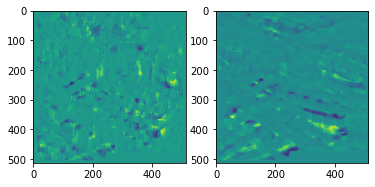

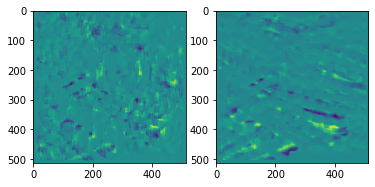

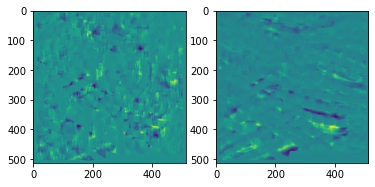

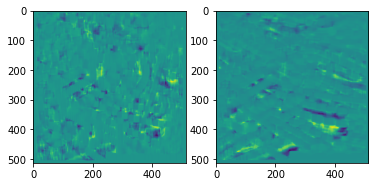

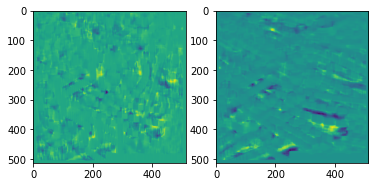

In [35]:
imgs = io.get_reader('cars.gif') #io.get_reader('cells.gif')
imgs = [i[::,::]/255 for i in imgs] #quick normalization

for ii in range(5):
    print(ii)
    out_OF = lucas_kanade_np(imgs[ii], imgs[ii+1])
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(out_OF[:,:,0])
    ax[1].imshow(out_OF[:,:,1])
    
# with io.get_writer('cells_OF_window8.gif', mode='I') as writer:
#    for ii in range(len(imgs) - 1):
#       print(ii)
#       out_OF = lucas_kanade_np(imgs[ii], imgs[ii+1])
#       out = V2RGB(out_OF[:,:,0],out_OF[:,:,1])
#       writer.append_data((out*255).astype(np.uint8))

### Question 1 (1pts)

Given the assuptions of optical flow, what are some aspects of the images that could break your program?

One of the assumption of the optical flow algorithm is that the brightness of our tracked pixel will be constant over time. Thus, in case the brightness of the tracked pixel would change significantly, the algorithm could be broken.

In fact, if the following equation does not stand: 
$$ I(x,y,t)= I(x+\delta {x}, y+\delta {y}, t+\delta {t}) $$
then it means that even  $ I_{x}V_{x}+I_{y}V_{y}= -I_{t} $  is not true.